In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
seed_value = 42
tf.random.set_seed(seed_value)

In [18]:
train = ImageDataGenerator(
    rescale =1./255,
    horizontal_flip =True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

train_generator =train.flow_from_directory(
    'Equal_dataset/train',
    target_size=(256,256),
    batch_size=32,
    seed=seed_value,
    class_mode='sparse'
    
)

Found 4620 images belonging to 3 classes.


In [19]:
class_names = list(train_generator.class_indices.keys())
class_names

['Over Ripe', 'Ripe', 'Unripe']

In [20]:
validation= ImageDataGenerator(
    rescale =1./255,
    horizontal_flip =True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

val_generator =validation.flow_from_directory(
    'Equal_dataset/val',
    target_size=(256,256),
    batch_size=32,
    class_mode='sparse',
    seed=seed_value
)

Found 660 images belonging to 3 classes.


In [21]:
test = ImageDataGenerator(
    rescale =1./255,
    horizontal_flip =True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_generator =test.flow_from_directory(
    'Equal_dataset/test',
    target_size=(256,256),
    batch_size=32,
    class_mode='sparse',
    seed=seed_value
)

Found 1320 images belonging to 3 classes.


In [22]:
input_shape=(256,256,3)
n_classes= 3

model= models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size =(3,3), activation='relu'), #32filters, relu activation
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(), #flattens to 1d array
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 64)       

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
steps_per_epoch= int((len(train_generator))//32)
print(steps_per_epoch)

e= len(train_generator)
print(e)

4
145


In [26]:
history= model.fit(
    train_generator,
    batch_size=32,
    epochs= 15,
    validation_data= val_generator,
    validation_steps= 3, 
    verbose=1,
)

Epoch 1/15
145/145 [==============================] - 654s 4s/step - loss: 0.9387 - accuracy: 0.5221 - val_loss: 0.6559 - val_accuracy: 0.8125
Epoch 2/15
145/145 [==============================] - 580s 4s/step - loss: 0.4073 - accuracy: 0.8446 - val_loss: 0.2716 - val_accuracy: 0.8958
Epoch 3/15
145/145 [==============================] - 580s 4s/step - loss: 0.3183 - accuracy: 0.8857 - val_loss: 0.2745 - val_accuracy: 0.8958
Epoch 4/15
145/145 [==============================] - 582s 4s/step - loss: 0.2877 - accuracy: 0.8952 - val_loss: 0.3214 - val_accuracy: 0.8542
Epoch 5/15
145/145 [==============================] - 607s 4s/step - loss: 0.2510 - accuracy: 0.9087 - val_loss: 0.1745 - val_accuracy: 0.9479
Epoch 6/15
145/145 [==============================] - 620s 4s/step - loss: 0.2290 - accuracy: 0.9221 - val_loss: 0.2250 - val_accuracy: 0.8958
Epoch 7/15
145/145 [==============================] - 580s 4s/step - loss: 0.2296 - accuracy: 0.9188 - val_loss: 0.1901 - val_accuracy: 0.9688

In [27]:
scores=model.evaluate(test_generator)

42/42 [==============================] - 44s 1s/step - loss: 0.1946 - accuracy: 0.9318


In [28]:
acc=history.history['accuracy']
val_acc= history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

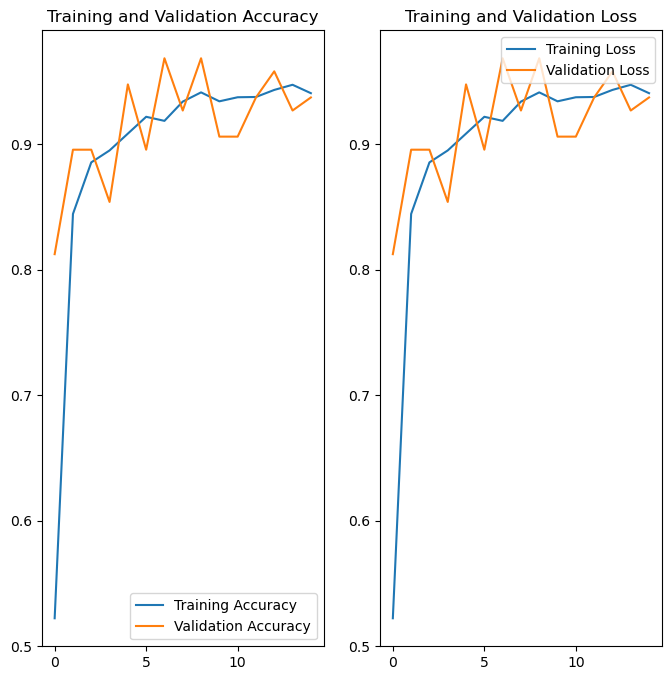

In [29]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(15), acc, label='Training Accuracy')
plt.plot(range(15),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(15), acc, label='Training Loss')
plt.plot(range(15),val_acc, label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()

first image to predict
actual label: Over Ripe
1/1 [==============================] - 1s 834ms/step
predicted label: Over Ripe


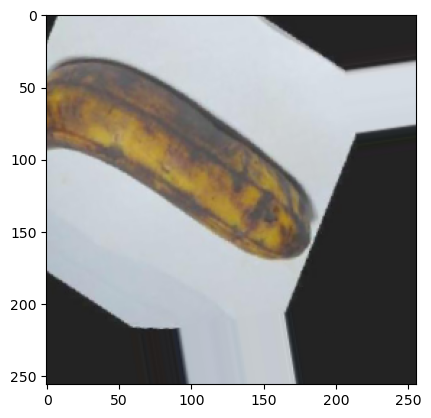

In [30]:
import numpy as np
for image_batch, label_batch in test_generator:
    first_image= image_batch[0]
    first_label = int(label_batch[0])
    
    print('first image to predict' )
    plt.imshow(first_image)
    print('actual label:', class_names[first_label])
    
    batch_prediction= model.predict(image_batch)
    print('predicted label:', class_names[np.argmax(batch_prediction[0])])
    
    break
    

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 64ms/step


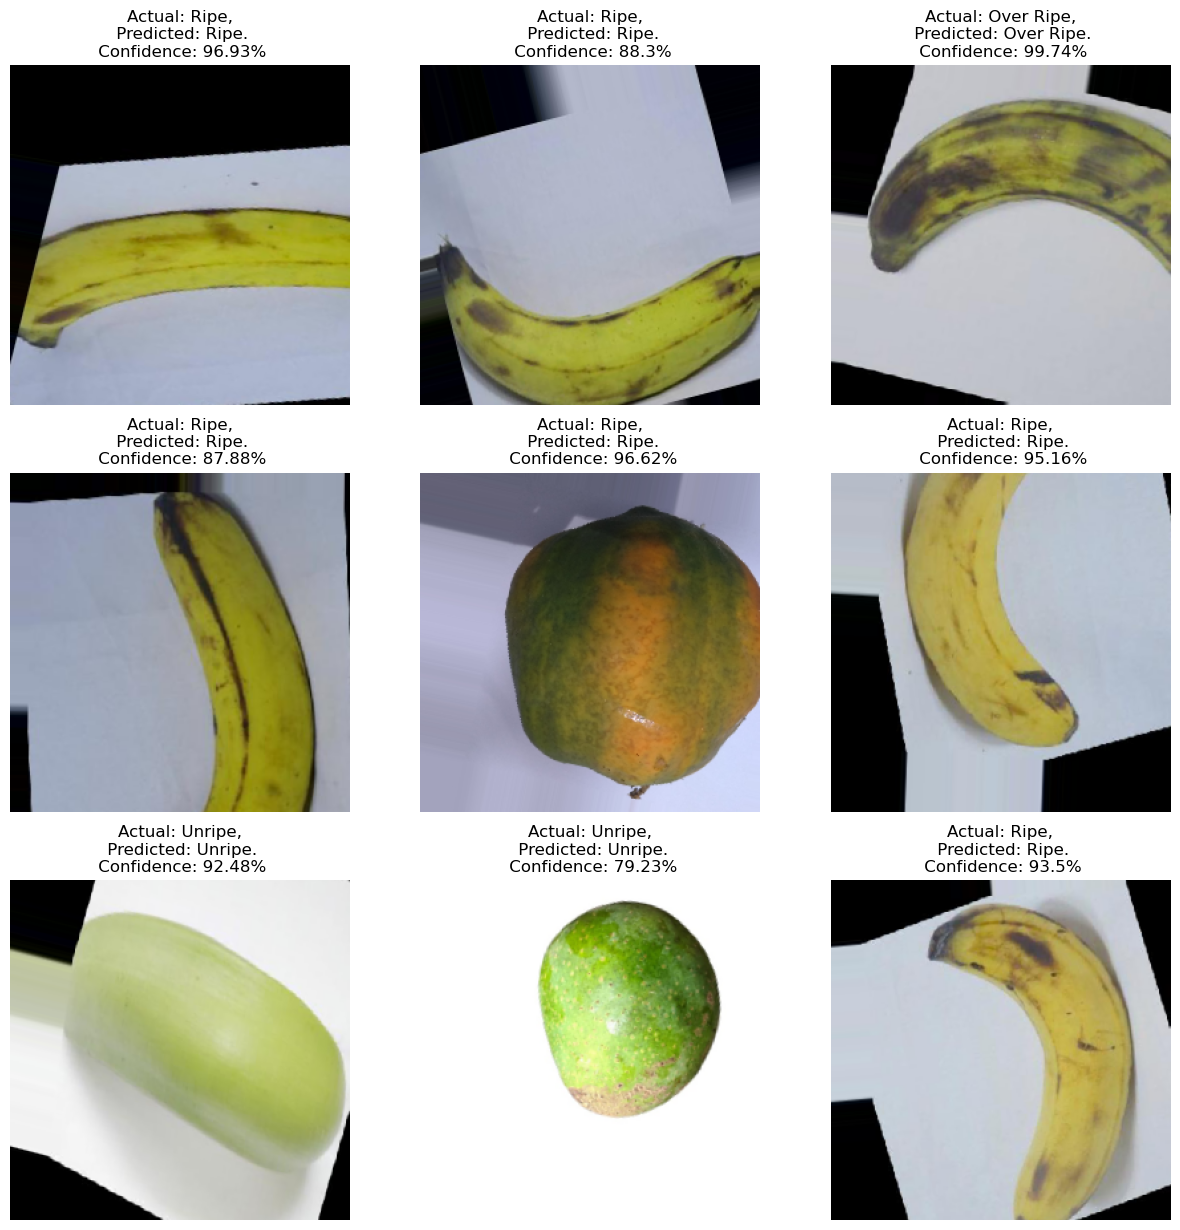

In [32]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

1/1 [==============================] - 0s 57ms/step


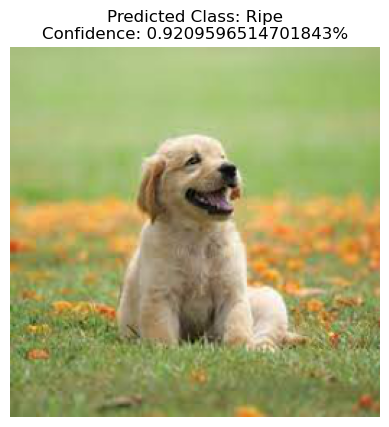

In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256)) 
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  
    return img_array, img

def predict(model, img_array, threshold=0.5):
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_index]

    if confidence < threshold:
        return "Unknown", confidence
    else:
        predicted_class = class_names[predicted_class_index]
        return predicted_class, confidence


image_path = 'test_images/test.jpg'
img_array, img = load_and_preprocess_image(image_path)
predicted_class, confidence = predict(model, img_array)

plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}\nConfidence: {confidence}%")
plt.axis("off")
plt.show()
